In [1]:
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import os
import numpy as np
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers

F:\chenlong_work\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
#导入数据
data=pd.read_csv("C:/Users/Administrator/Desktop/all_33.csv")
#data=np.loadtxt("C:/Users/Administrator/Desktop/all_33.csv",delimiter=",",skiprows=1)

In [14]:
data.describe()

,id,time,s,d,v5
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,487.500000,3.551515,144.167439,9.515212,35.823788
std,423.466945,1.433151,56.311245,2.034536,9.166605
min,7.000000,1.300000,44.349000,4.760000,5.020000
25%,232.500000,2.425000,101.964500,8.252500,29.980000
50%,426.500000,3.200000,129.521500,9.607000,36.970000
75%,666.500000,4.375000,163.447000,11.095750,43.540000
max,3101.000000,6.800000,296.756000,13.483000,54.670000


In [35]:
#查看data
data.head()

,id,time,s,d,v5
0,7,2.9,67.540,7.005,26.60
1,21,5.9,128.023,9.794,22.00
2,31,4.2,103.241,8.477,21.64
3,185,5.1,101.539,9.498,25.47
4,315,4.4,76.509,7.312,21.94


In [36]:
y1 = data['time'].copy()
y2 = data['s'].copy()
x1 = data['d'].copy()
x2 = data['v5'].copy()
x = data[['d','v5']].copy()

F:\chenlong_work\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


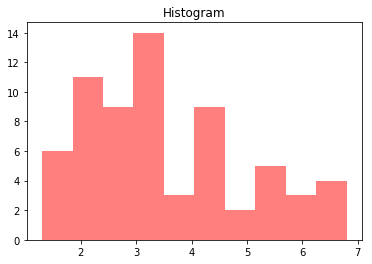

In [37]:
#时间T直方图
plt.hist(y1,bins=10, normed=0, histtype='stepfilled', facecolor='r', alpha=0.5);
plt.title('Histogram');
plt.show();

F:\chenlong_work\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


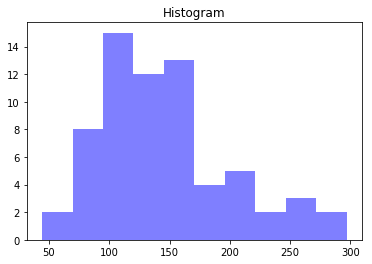

In [38]:
#纵向距离s直方图
plt.hist(y2,bins=10, normed=0, histtype='stepfilled', facecolor='b', alpha=0.5);
plt.title('Histogram');
plt.show();

In [41]:
#查看数据大小
data.shape

(66, 5)

In [42]:
#排序
order1=np.argsort(x1)
order2=np.argsort(x2)
yt_x1=[]
yt_x2=[]
ys_x1=[]
ys_x2=[]
for i in range(0,66):
    yt_x1.append(y1[order1[i]])
    ys_x1.append(y2[order1[i]])
    yt_x2.append(y1[order2[i]])
    ys_x2.append(y2[order2[i]])

In [43]:
#直线方程函数
def f_1(x, A, B):
    return A*x + B

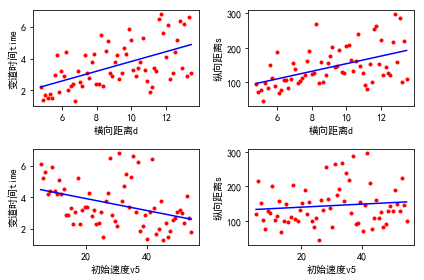

In [44]:
#观察各个特征对y1,y2的关系
plt.subplot(2, 2, 1)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel("横向距离d")
plt.ylabel("变道时间time")
x = np.linspace(min(x1),max(x1),66)
plt.plot(x,yt_x1,'r.')
A1, B1 = optimize.curve_fit(f_1, x, yt_x1)[0]
s_y1 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y1,'b')
plt.subplot(2, 2, 2)
plt.xlabel("横向距离d")
plt.ylabel("纵向距离s")
x = np.linspace(min(x1),max(x1),66)
plt.plot(x,ys_x1,'r.')
A1, B1 = optimize.curve_fit(f_1, x, ys_x1)[0]
s_y2 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y2,'b')
plt.subplot(2, 2, 3)
plt.xlabel("初始速度v5")
plt.ylabel("变道时间time")
x = np.linspace(min(x2),max(x2),66)
plt.plot(x,yt_x2,'r.')
A1, B1 = optimize.curve_fit(f_1, x, yt_x2)[0]
s_y3 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y3,'b')
plt.subplot(2, 2, 4)
plt.xlabel("初始速度v5")
plt.ylabel("纵向距离s")
x = np.linspace(min(x2),max(x2),66)
plt.plot(x,ys_x2,'r.')
A1, B1 = optimize.curve_fit(f_1, x, ys_x2)[0]
s_y4 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y4,'b')

In [91]:
#分割训练集和验证集
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [47]:
#定义rmse
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [50]:
#使用平均值计算误差
compute_rmse(np.mean(yt_train),yt_test)

1.4551688485715037

In [51]:
compute_rmse(np.mean(ys_train),ys_test)

60.4169087293933

In [87]:
#归一化处理
#s_X=(X- X.min()) / (X.max() - X.min())
s_Xt_train = (Xt_train- X.min()) / (X.max() - X.min())
s_Xt_test=(Xt_test- X.min()) / (X.max() - X.min())

In [131]:
#归一化处理后
s_Xt_train.head()

,d,v5
65,0.168979,0.599396
2,0.426115,0.334743
11,0.671099,0.473917
30,0.770836,0.000000
10,0.103863,0.732125


In [150]:
#线性模型
LR =  LinearRegression()
LR.fit(s_Xt_train,yt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

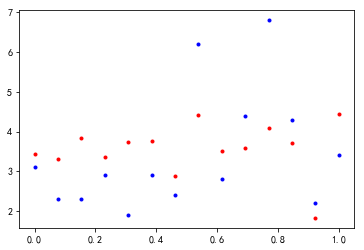

In [152]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,14)
plt.plot(x,LR.predict(s_Xt_test)[0:14],'r.',x,yt_test[0:14],'b.')

In [147]:
#搭建ann模型训练time
model_t=Sequential()
model_t.add(Dense(10,input_shape=(2,),activation='relu'))
model_t.add(Dense(5,activation='relu'))
model_t.add(Dense(1))
model_t.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model_t.fit(s_Xt_train,yt_train, batch_size=5, epochs=100)

Epoch 1/100
52/52 [==============================] - 1s 12ms/step - loss: 15.2240 - acc: 0.0000e+00
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 14.5197 - acc: 0.0000e+00
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 13.8968 - acc: 0.0000e+00
Epoch 4/100
52/52 [==============================] - 0s 942us/step - loss: 13.4056 - acc: 0.0000e+00
Epoch 5/100
52/52 [==============================] - 0s 923us/step - loss: 12.9737 - acc: 0.0000e+00
Epoch 6/100
52/52 [==============================] - 0s 942us/step - loss: 12.5861 - acc: 0.0000e+00
Epoch 7/100
52/52 [==============================] - 0s 962us/step - loss: 12.1927 - acc: 0.0000e+00
Epoch 8/100
52/52 [==============================] - 0s 962us/step - loss: 11.7687 - acc: 0.0000e+00
Epoch 9/100
52/52 [==============================] - 0s 942us/step - loss: 11.3646 - acc: 0.0000e+00
Epoch 10/100
52/52 [==============================] - 0s 962us/step - loss: 10.9121 - acc: 0.000

52/52 [==============================] - 0s 942us/step - loss: 1.5439 - acc: 0.0192
Epoch 86/100
52/52 [==============================] - 0s 981us/step - loss: 1.5319 - acc: 0.0192
Epoch 87/100
52/52 [==============================] - 0s 904us/step - loss: 1.5241 - acc: 0.0192
Epoch 88/100
52/52 [==============================] - 0s 923us/step - loss: 1.5130 - acc: 0.0192
Epoch 89/100
52/52 [==============================] - 0s 904us/step - loss: 1.5062 - acc: 0.0192
Epoch 90/100
52/52 [==============================] - 0s 865us/step - loss: 1.4972 - acc: 0.0192
Epoch 91/100
52/52 [==============================] - 0s 846us/step - loss: 1.4872 - acc: 0.0192
Epoch 92/100
52/52 [==============================] - 0s 865us/step - loss: 1.4835 - acc: 0.0192
Epoch 93/100
52/52 [==============================] - 0s 846us/step - loss: 1.4701 - acc: 0.0192
Epoch 94/100
52/52 [==============================] - 0s 865us/step - loss: 1.4623 - acc: 0.0192
Epoch 95/100
52/52 [=======================

In [148]:
#预测time的结果
result_t= model_t.predict(s_Xt_test)

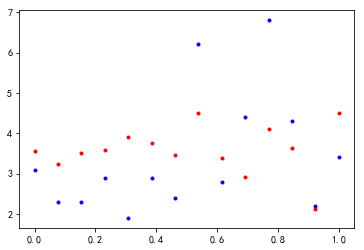

In [149]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,14)
plt.plot(x,result_t[0:14],'r.',x,yt_test[0:14],'b.')

In [109]:
#分割数据集
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y2, test_size=0.2, random_state=1)

In [110]:
#归一化处理
s_Xs_train = (Xs_train- X.min()) / (X.max() - X.min())
s_Xs_test=(Xs_test- X.min()) / (X.max() - X.min())

In [128]:
#搭建ann模型训练s
model_s=Sequential()
model_s.add(Dense(10,input_shape=(2,),activation='relu'))
model_s.add(Dense(5,activation='relu'))
model_s.add(Dense(1))
model_s.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model_s.fit(s_Xs_train,ys_train, batch_size=5, epochs=1000)

Epoch 1/1000
52/52 [==============================] - 1s 10ms/step - loss: 22898.3125 - acc: 0.0000e+00
Epoch 2/1000
52/52 [==============================] - 0s 1ms/step - loss: 22889.4991 - acc: 0.0000e+00
Epoch 3/1000
52/52 [==============================] - 0s 981us/step - loss: 22876.9926 - acc: 0.0000e+00
Epoch 4/1000
52/52 [==============================] - 0s 923us/step - loss: 22860.1541 - acc: 0.0000e+00
Epoch 5/1000
52/52 [==============================] - 0s 904us/step - loss: 22840.2106 - acc: 0.0000e+00
Epoch 6/1000
52/52 [==============================] - 0s 1ms/step - loss: 22816.2253 - acc: 0.0000e+00
Epoch 7/1000
52/52 [==============================] - 0s 1ms/step - loss: 22789.4679 - acc: 0.0000e+00
Epoch 8/1000
52/52 [==============================] - 0s 981us/step - loss: 22759.8375 - acc: 0.0000e+00
Epoch 9/1000
52/52 [==============================] - 0s 1ms/step - loss: 22725.9609 - acc: 0.0000e+00
Epoch 10/1000
52/52 [==============================] - 0s 1ms/st

52/52 [==============================] - 0s 904us/step - loss: 4709.0161 - acc: 0.0000e+00
Epoch 80/1000
52/52 [==============================] - 0s 808us/step - loss: 4454.4663 - acc: 0.0000e+00
Epoch 81/1000
52/52 [==============================] - 0s 885us/step - loss: 4230.9805 - acc: 0.0000e+00
Epoch 82/1000
52/52 [==============================] - 0s 865us/step - loss: 3991.8372 - acc: 0.0000e+00
Epoch 83/1000
52/52 [==============================] - 0s 865us/step - loss: 3804.5648 - acc: 0.0000e+00
Epoch 84/1000
52/52 [==============================] - 0s 846us/step - loss: 3624.4286 - acc: 0.0000e+00
Epoch 85/1000
52/52 [==============================] - 0s 885us/step - loss: 3463.6792 - acc: 0.0000e+00
Epoch 86/1000
52/52 [==============================] - 0s 904us/step - loss: 3324.2253 - acc: 0.0000e+00
Epoch 87/1000
52/52 [==============================] - 0s 885us/step - loss: 3184.1023 - acc: 0.0000e+00
Epoch 88/1000
52/52 [==============================] - 0s 865us/step 

52/52 [==============================] - 0s 923us/step - loss: 2290.8212 - acc: 0.0000e+00
Epoch 157/1000
52/52 [==============================] - 0s 885us/step - loss: 2289.3301 - acc: 0.0000e+00
Epoch 158/1000
52/52 [==============================] - 0s 904us/step - loss: 2289.6525 - acc: 0.0000e+00
Epoch 159/1000
52/52 [==============================] - 0s 865us/step - loss: 2287.8709 - acc: 0.0000e+00
Epoch 160/1000
52/52 [==============================] - 0s 923us/step - loss: 2287.3688 - acc: 0.0000e+00
Epoch 161/1000
52/52 [==============================] - 0s 1ms/step - loss: 2286.9043 - acc: 0.0000e+00
Epoch 162/1000
52/52 [==============================] - 0s 808us/step - loss: 2286.3979 - acc: 0.0000e+00
Epoch 163/1000
52/52 [==============================] - 0s 885us/step - loss: 2285.7451 - acc: 0.0000e+00
Epoch 164/1000
52/52 [==============================] - 0s 923us/step - loss: 2285.0067 - acc: 0.0000e+00
Epoch 165/1000
52/52 [==============================] - 0s 942u

52/52 [==============================] - 0s 885us/step - loss: 2243.7266 - acc: 0.0000e+00
Epoch 234/1000
52/52 [==============================] - 0s 846us/step - loss: 2242.4062 - acc: 0.0000e+00
Epoch 235/1000
52/52 [==============================] - 0s 827us/step - loss: 2241.5412 - acc: 0.0000e+00
Epoch 236/1000
52/52 [==============================] - 0s 904us/step - loss: 2241.0753 - acc: 0.0000e+00
Epoch 237/1000
52/52 [==============================] - 0s 904us/step - loss: 2243.8516 - acc: 0.0000e+00
Epoch 238/1000
52/52 [==============================] - 0s 904us/step - loss: 2240.1486 - acc: 0.0000e+00
Epoch 239/1000
52/52 [==============================] - 0s 981us/step - loss: 2244.7637 - acc: 0.0000e+00
Epoch 240/1000
52/52 [==============================] - 0s 1ms/step - loss: 2241.3330 - acc: 0.0000e+00
Epoch 241/1000
52/52 [==============================] - 0s 1ms/step - loss: 2238.3165 - acc: 0.0000e+00
Epoch 242/1000
52/52 [==============================] - 0s 1ms/st

52/52 [==============================] - 0s 942us/step - loss: 2206.5549 - acc: 0.0000e+00
Epoch 312/1000
52/52 [==============================] - 0s 981us/step - loss: 2201.0895 - acc: 0.0000e+00
Epoch 313/1000
52/52 [==============================] - 0s 942us/step - loss: 2202.2395 - acc: 0.0000e+00
Epoch 314/1000
52/52 [==============================] - 0s 1ms/step - loss: 2200.7107 - acc: 0.0000e+00
Epoch 315/1000
52/52 [==============================] - 0s 981us/step - loss: 2200.4167 - acc: 0.0000e+00
Epoch 316/1000
52/52 [==============================] - 0s 962us/step - loss: 2200.0181 - acc: 0.0000e+00
Epoch 317/1000
52/52 [==============================] - 0s 923us/step - loss: 2199.1337 - acc: 0.0000e+00
Epoch 318/1000
52/52 [==============================] - 0s 981us/step - loss: 2201.1312 - acc: 0.0000e+00
Epoch 319/1000
52/52 [==============================] - 0s 962us/step - loss: 2198.7209 - acc: 0.0000e+00
Epoch 320/1000
52/52 [==============================] - 0s 1000

52/52 [==============================] - 0s 942us/step - loss: 2169.5420 - acc: 0.0000e+00
Epoch 389/1000
52/52 [==============================] - 0s 981us/step - loss: 2168.0553 - acc: 0.0000e+00
Epoch 390/1000
52/52 [==============================] - 0s 1ms/step - loss: 2170.2815 - acc: 0.0000e+00
Epoch 391/1000
52/52 [==============================] - 0s 923us/step - loss: 2168.0222 - acc: 0.0000e+00
Epoch 392/1000
52/52 [==============================] - 0s 1ms/step - loss: 2174.1309 - acc: 0.0000e+00
Epoch 393/1000
52/52 [==============================] - 0s 923us/step - loss: 2170.5095 - acc: 0.0000e+00
Epoch 394/1000
52/52 [==============================] - 0s 846us/step - loss: 2167.7672 - acc: 0.0000e+00
Epoch 395/1000
52/52 [==============================] - 0s 885us/step - loss: 2166.0386 - acc: 0.0000e+00
Epoch 396/1000
52/52 [==============================] - 0s 904us/step - loss: 2168.1091 - acc: 0.0000e+00
Epoch 397/1000
52/52 [==============================] - 0s 865us/

52/52 [==============================] - 0s 865us/step - loss: 2142.5914 - acc: 0.0000e+00
Epoch 466/1000
52/52 [==============================] - 0s 923us/step - loss: 2142.8381 - acc: 0.0000e+00
Epoch 467/1000
52/52 [==============================] - 0s 846us/step - loss: 2141.2590 - acc: 0.0000e+00
Epoch 468/1000
52/52 [==============================] - 0s 885us/step - loss: 2140.4749 - acc: 0.0000e+00
Epoch 469/1000
52/52 [==============================] - 0s 904us/step - loss: 2140.7531 - acc: 0.0000e+00
Epoch 470/1000
52/52 [==============================] - 0s 885us/step - loss: 2140.7920 - acc: 0.0000e+00
Epoch 471/1000
52/52 [==============================] - 0s 865us/step - loss: 2140.2093 - acc: 0.0000e+00
Epoch 472/1000
52/52 [==============================] - 0s 904us/step - loss: 2143.8673 - acc: 0.0000e+00
Epoch 473/1000
52/52 [==============================] - 0s 865us/step - loss: 2140.9928 - acc: 0.0000e+00
Epoch 474/1000
52/52 [==============================] - 0s 86

52/52 [==============================] - 0s 1ms/step - loss: 2120.1340 - acc: 0.0000e+00
Epoch 543/1000
52/52 [==============================] - 0s 1ms/step - loss: 2120.5236 - acc: 0.0000e+00
Epoch 544/1000
52/52 [==============================] - 0s 981us/step - loss: 2123.4075 - acc: 0.0000e+00
Epoch 545/1000
52/52 [==============================] - 0s 865us/step - loss: 2121.5531 - acc: 0.0000e+00
Epoch 546/1000
52/52 [==============================] - 0s 788us/step - loss: 2118.4621 - acc: 0.0000e+00
Epoch 547/1000
52/52 [==============================] - 0s 846us/step - loss: 2119.3686 - acc: 0.0000e+00
Epoch 548/1000
52/52 [==============================] - 0s 846us/step - loss: 2119.1160 - acc: 0.0000e+00
Epoch 549/1000
52/52 [==============================] - 0s 827us/step - loss: 2118.9775 - acc: 0.0000e+00
Epoch 550/1000
52/52 [==============================] - 0s 827us/step - loss: 2117.7910 - acc: 0.0000e+00
Epoch 551/1000
52/52 [==============================] - 0s 962us/

52/52 [==============================] - 0s 923us/step - loss: 2104.1600 - acc: 0.0000e+00
Epoch 620/1000
52/52 [==============================] - 0s 962us/step - loss: 2104.3181 - acc: 0.0000e+00
Epoch 621/1000
52/52 [==============================] - 0s 865us/step - loss: 2107.0554 - acc: 0.0000e+00
Epoch 622/1000
52/52 [==============================] - 0s 942us/step - loss: 2101.8854 - acc: 0.0000e+00
Epoch 623/1000
52/52 [==============================] - 0s 923us/step - loss: 2102.2022 - acc: 0.0000e+00
Epoch 624/1000
52/52 [==============================] - 0s 885us/step - loss: 2101.3176 - acc: 0.0000e+00
Epoch 625/1000
52/52 [==============================] - 0s 846us/step - loss: 2102.9331 - acc: 0.0000e+00
Epoch 626/1000
52/52 [==============================] - 0s 942us/step - loss: 2101.4390 - acc: 0.0000e+00
Epoch 627/1000
52/52 [==============================] - 0s 942us/step - loss: 2104.9347 - acc: 0.0000e+00
Epoch 628/1000
52/52 [==============================] - 0s 90

52/52 [==============================] - 0s 981us/step - loss: 2088.8799 - acc: 0.0000e+00
Epoch 697/1000
52/52 [==============================] - 0s 885us/step - loss: 2088.6993 - acc: 0.0000e+00
Epoch 698/1000
52/52 [==============================] - 0s 865us/step - loss: 2087.9438 - acc: 0.0000e+00
Epoch 699/1000
52/52 [==============================] - 0s 865us/step - loss: 2087.5725 - acc: 0.0000e+00
Epoch 700/1000
52/52 [==============================] - 0s 904us/step - loss: 2088.7368 - acc: 0.0000e+00
Epoch 701/1000
52/52 [==============================] - 0s 865us/step - loss: 2090.4079 - acc: 0.0000e+00
Epoch 702/1000
52/52 [==============================] - 0s 885us/step - loss: 2087.6393 - acc: 0.0000e+00
Epoch 703/1000
52/52 [==============================] - 0s 1ms/step - loss: 2090.5690 - acc: 0.0000e+00
Epoch 704/1000
52/52 [==============================] - 0s 1ms/step - loss: 2087.2360 - acc: 0.0000e+00
Epoch 705/1000
52/52 [==============================] - 0s 923us/

52/52 [==============================] - 0s 1ms/step - loss: 2079.1264 - acc: 0.0000e+00
Epoch 774/1000
52/52 [==============================] - 0s 1ms/step - loss: 2077.3447 - acc: 0.0000e+00
Epoch 775/1000
52/52 [==============================] - 0s 1000us/step - loss: 2077.9081 - acc: 0.0000e+00
Epoch 776/1000
52/52 [==============================] - 0s 942us/step - loss: 2078.3707 - acc: 0.0000e+00
Epoch 777/1000
52/52 [==============================] - 0s 885us/step - loss: 2081.1502 - acc: 0.0000e+00
Epoch 778/1000
52/52 [==============================] - 0s 923us/step - loss: 2076.4813 - acc: 0.0000e+00
Epoch 779/1000
52/52 [==============================] - 0s 923us/step - loss: 2080.4957 - acc: 0.0000e+00
Epoch 780/1000
52/52 [==============================] - 0s 904us/step - loss: 2078.2567 - acc: 0.0000e+00
Epoch 781/1000
52/52 [==============================] - 0s 904us/step - loss: 2079.3795 - acc: 0.0000e+00
Epoch 782/1000
52/52 [==============================] - 0s 962us

52/52 [==============================] - 0s 923us/step - loss: 2072.6005 - acc: 0.0000e+00
Epoch 851/1000
52/52 [==============================] - 0s 981us/step - loss: 2068.5945 - acc: 0.0000e+00
Epoch 852/1000
52/52 [==============================] - 0s 885us/step - loss: 2069.6893 - acc: 0.0000e+00
Epoch 853/1000
52/52 [==============================] - 0s 904us/step - loss: 2068.5430 - acc: 0.0000e+00
Epoch 854/1000
52/52 [==============================] - 0s 885us/step - loss: 2068.6782 - acc: 0.0000e+00
Epoch 855/1000
52/52 [==============================] - 0s 865us/step - loss: 2067.6978 - acc: 0.0000e+00
Epoch 856/1000
52/52 [==============================] - 0s 885us/step - loss: 2078.5154 - acc: 0.0000e+00
Epoch 857/1000
52/52 [==============================] - 0s 865us/step - loss: 2065.0850 - acc: 0.0000e+00
Epoch 858/1000
52/52 [==============================] - ETA: 0s - loss: 1633.4183 - acc: 0.0000e+ - 0s 865us/step - loss: 2068.2842 - acc: 0.0000e+00
Epoch 859/1000
52

52/52 [==============================] - 0s 981us/step - loss: 2061.2057 - acc: 0.0000e+00
Epoch 928/1000
52/52 [==============================] - 0s 942us/step - loss: 2062.1294 - acc: 0.0000e+00
Epoch 929/1000
52/52 [==============================] - 0s 827us/step - loss: 2061.3030 - acc: 0.0000e+00
Epoch 930/1000
52/52 [==============================] - 0s 942us/step - loss: 2062.4698 - acc: 0.0000e+00
Epoch 931/1000
52/52 [==============================] - 0s 904us/step - loss: 2061.2816 - acc: 0.0000e+00
Epoch 932/1000
52/52 [==============================] - 0s 865us/step - loss: 2061.3721 - acc: 0.0000e+00
Epoch 933/1000
52/52 [==============================] - 0s 827us/step - loss: 2061.3143 - acc: 0.0000e+00
Epoch 934/1000
52/52 [==============================] - 0s 885us/step - loss: 2063.6993 - acc: 0.0000e+00
Epoch 935/1000
52/52 [==============================] - 0s 904us/step - loss: 2060.3474 - acc: 0.0000e+00
Epoch 936/1000
52/52 [==============================] - 0s 84

In [129]:
#预测纵向距离s的结果
result_s= model_s.predict(s_Xs_test)

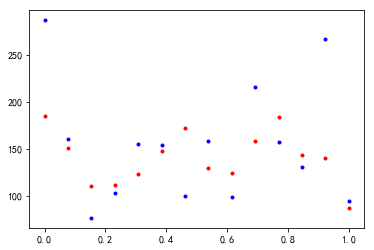

In [130]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,14)
plt.plot(x,result_s[0:14],'r.',x,ys_test[0:14],'b.')